In [13]:
from collections import defaultdict
from itertools   import groupby
from operator    import itemgetter
from operator    import attrgetter

import numpy             as np
import tables            as tb
import pandas            as pd
import matplotlib.pyplot as plt

import invisible_cities.core.fit_functions as fitf
import invisible_cities.io  .pmaps_io      as pmapio

In [15]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8
plt.rcParams[  "font.size"   ] = 15

In [3]:
pmap_file = "/Users/Gonzalo/Downloads/reset_4495_21215.h5"
pmaps = pmapio.load_pmaps(pmap_file)

In [4]:
def to_sensor_id(index): return (index     //   64 + 1) * 1000 + index     %   64
def to_index(sensor_id): return (sensor_id // 1000 - 1) * 64   + sensor_id % 1000

In [5]:
nevt  = 21215
npeak =     0
pmap  = pmaps    [nevt ]
peak  = pmap .s2s[npeak]
sipms = peak.sipms

In [6]:
data      = defaultdict(list)
raw_table = []
with tb.open_file(pmap_file) as f:
    table = f.root.PMAPS.S2Si
    for i in table.where(f"(event == {nevt}) & (peak == {npeak})"):
        i = i.fetch_all_fields()
        raw_table.append(i)
        e, p, s, a = i
        data[s].append(a)

In [56]:
print(   len(sipms.ids))
print(sorted(sipms.ids))

298
[190, 267, 290, 307, 340, 351, 375, 379, 528, 552, 568, 570, 613, 639, 642, 688, 715, 921, 937, 944, 952, 980, 985, 992, 996, 1000, 1003, 1005, 1006, 1008, 1009, 1011, 1012, 1013, 1014, 1015, 1016, 1019, 1020, 1021, 1022, 1023, 1025, 1027, 1038, 1040, 1041, 1042, 1043, 1044, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1072, 1073, 1074, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1100, 1108, 1115, 1119, 1125, 1126, 1127, 1131, 1132, 1133, 1134, 1135, 1136, 1140, 1141, 1142, 1143, 1146, 1148, 1149, 1150, 1151, 1205, 1280, 1281, 1282, 1283, 1284, 1285, 1288, 1289, 1290, 1291, 1292, 1293, 1296, 1297, 1298, 1300, 1304, 1305, 1306, 1312, 1320, 1321, 1322, 1328, 1329, 1336, 1344, 1345, 1346, 1347, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 

In [7]:
sipms


------------------------
SiPMResponses instance
------------------------
Number of sensors: 298
          | ID: 1025
          | WF: [ 0.          0.          0.          0.          0.          0.          1.5443995
0.          0.          1.86377394  0.          0.          2.0553987   0.
1.6721493   2.0553987   0.          0.          0.          0.          2.3108983
0.          0.          0.          0.          0.          0.          0.
0.          0.          0.          0.          0.          0.          0.
0.          0.          0.          0.          0.          0.          0.
0.          0.          2.56639791  0.          0.          0.          0.
0.          0.          0.          0.          0.          0.          0.
0.          0.          0.          0.          0.          0.          0.
0.          0.          0.          0.          0.          0.          0.
0.          0.          0.          0.          0.          0.          0.
0.          0.          0

In [8]:
sipms.waveform(1025)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.5443995 ,  0.        ,  0.        ,  1.86377394,
        0.        ,  0.        ,  2.0553987 ,  0.        ,  1.6721493 ,
        2.0553987 ,  0.        ,  0.        ,  0.        ,  0.        ,
        2.3108983 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  2.56639791,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [49]:
len(raw_tabletable)

40528

In [48]:
for row in raw_table:
    print(row)

(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  1.5443995)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  1.86377394)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  2.0553987)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  1.6721493)
(21215, 0, 1025,  2.0553987)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  2.3108983)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 1025,  0.)
(21215, 0, 

(21215, 0, 1023,  0.)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  1.69522333)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  3.33990216)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  1.75396192)
(21215, 0, 1023,  3.22242522)
(21215, 0, 1023,  3.10494804)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  4.92584276)
(21215, 0, 1023,  6.45304441)
(21215, 0, 1023,  3.51611781)
(21215, 0, 1023,  2.92873263)
(21215, 0, 1023,  5.68944359)
(21215, 0, 1023,  4.63215017)
(21215, 0, 1023,  4.74962711)
(21215, 0, 1023,  5.92439747)
(21215, 0, 1023,  3.22242522)
(21215, 0, 1023,  2.9874711)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  2.34134722)
(21215, 0, 1023,  3.39864087)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  3.33990216)
(21215, 0, 1023,  3.22242522)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  0.)
(21215, 0, 1023,  3.39864087)
(21215, 0, 1023,  4.92584276)
(21215, 0, 1023,  6.39430571)
(21215, 0, 1023,  5.16079664)
(21215, 0, 1023,  2.75251

(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 528,  0.)
(21215, 0, 10

(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1048,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  2.78313851)
(21215, 0, 1049,  2.14868665)
(21215, 0, 1049,  2.9561708)
(21215, 0, 1049,  6.12843037)
(21215, 0, 1049,  9.76210976)
(21215, 0, 1049,  8.7239151)
(21215, 0, 1049,  8.1471405)
(21215, 0, 1049,  4.9172039)
(21215, 0, 1049,  4.28275204)
(21215, 0, 1049,  4.51346207)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)
(21215, 0, 1049,  0.)


(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0, 1052,  0.)
(21215, 0,

(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1057,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  0.)
(21215, 0, 1058,  3.11094856)
(21215, 0, 1058,  2.03121614)
(21215, 0, 1058,  5.03047228)
(21215, 0, 1058,  3.77078485)
(21215, 0, 1058,  6.4101305)
(21215, 0, 1058,  9.64932728)
(21215, 0, 1058,  18.40715408)
(21215, 0, 1058,  30.8240757)
(21215, 0, 1058,  26.02526665)
(21215, 0, 1058,  24.94553375)
(21215, 0, 1058,  17.3874073)
(21215, 

(21215, 0, 1061,  0.)
(21215, 0, 1061,  0.)
(21215, 0, 1061,  0.)
(21215, 0, 1061,  0.)
(21215, 0, 1061,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  1.74057746)
(21215, 0, 1062,  3.15307331)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  1.74057746)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  3.50619721)
(21215, 0, 1062,  4.38900709)
(21215, 0, 1062,  2.3879714)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  4.15359116)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)
(21215, 0, 1062,  0.)

(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0, 1072,  0.)
(21215, 0,

(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0, 1076,  0.)
(21215, 0,

(21215, 0, 1081,  38.35738754)
(21215, 0, 1081,  34.28619385)
(21215, 0, 1081,  18.57482338)
(21215, 0, 1081,  13.47149563)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  6.76262665)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0, 1081,  0.)
(21215, 0,

(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0, 1087,  0.)
(21215, 0,

(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1604,  0.)
(21215, 0, 1605,  0.)
(21215, 0, 1605,  0.)
(21215, 0, 1605,  0.)
(21215, 0, 1605,  0.)
(21215, 0,

(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0, 1100,  0.)
(21215, 0,

(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0, 1108,  0.)
(21215, 0,

(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0, 1603,  0.)
(21215, 0,

(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  2.75996184)
(21215, 0, 1132,  2.87807918)
(21215, 0, 1132,  1.63784599)
(21215, 0, 1132,  1.63784599)
(21215, 0, 1132,  2.87807918)
(21215, 0, 1132,  1.75596344)
(21215, 0, 1132,  1.99219835)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  1.93313956)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1132,  0.)
(21215, 0, 1

(21215, 0, 1142,  5.70360518)
(21215, 0, 1142,  2.82464743)
(21215, 0, 1142,  4.20414829)
(21215, 0, 1142,  6.60327959)
(21215, 0, 1142,  3.30447388)
(21215, 0, 1142,  2.16488624)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215, 0, 1142,  0.)
(21215

(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 642,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  0.)
(21215, 0, 1668,  4.45884037)
(21215, 0, 1668,  1.69191718)
(21

(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  3.39396429)
(21215, 0, 1678,  1.93829274)
(21215, 0, 1678,  1.67362523)
(21215, 0, 1678,  1.67362523)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  2.93079615)
(21215, 0, 1678,  2.26912713)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  2.20296025)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  3.0631299)
(21215, 0, 1678,  4.2541337)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  3.26163054)
(21215, 0, 1678,  2.33529401)
(21215, 0, 1678,  2.26912713)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(21215, 0, 1678,  0.)
(212

(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  1.74964154)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(21215, 0, 1693,  0.)
(2

(21215, 0, 1399,  0.)
(21215, 0, 1399,  2.8328135)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21215, 0, 1399,  0.)
(21

(21215, 0, 1403,  13.05897236)
(21215, 0, 1403,  7.50664663)
(21215, 0, 1403,  10.90336323)
(21215, 0, 1403,  2.80349994)
(21215, 0, 1403,  8.29050446)
(21215, 0, 1403,  5.02443027)
(21215, 0, 1403,  10.18482685)
(21215, 0, 1403,  4.95910883)
(21215, 0, 1403,  6.26553822)
(21215, 0, 1403,  9.00904083)
(21215, 0, 1403,  7.44132519)
(21215, 0, 1403,  8.09453964)
(21215, 0, 1403,  6.72278881)
(21215, 0, 1403,  11.22997093)
(21215, 0, 1403,  8.61711121)
(21215, 0, 1403,  9.20500469)
(21215, 0, 1403,  7.83325386)
(21215, 0, 1403,  5.54700184)
(21215, 0, 1403,  7.83325386)
(21215, 0, 1403,  7.57196808)
(21215, 0, 1403,  6.8534317)
(21215, 0, 1403,  7.18003893)
(21215, 0, 1403,  6.78811026)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  5.87360954)
(21215, 0, 1403,  7.11471748)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  6.52682447)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  0.)
(21215, 0, 1403,  0

(21215, 0, 1082,  34.89797974)
(21215, 0, 1082,  24.0518589)
(21215, 0, 1082,  21.03219986)
(21215, 0, 1082,  11.17208958)
(21215, 0, 1082,  12.7743578)
(21215, 0, 1082,  10.00120163)
(21215, 0, 1082,  14.19174862)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082,  0.)
(21215, 0, 1082

(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0, 1285,  0.)
(21215, 0,

(21215, 0, 1296,  0.)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  1.95375717)
(21215, 0, 1296,  2.07710433)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  2.13877797)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  2.87886071)
(21215, 0, 1296,  3.37224936)
(21215, 0, 1296,  2.81718731)
(21215, 0, 1296,  2.94053435)
(21215, 0, 1296,  4.23567963)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  2.32379866)
(21215, 0, 1296,  4.91408873)
(21215, 0, 1296,  4.91408873)
(21215, 0, 1296,  3.49559641)
(21215, 0, 1296,  5.34580374)
(21215, 0, 1296,  3.49559641)
(21215, 0, 1296,  4.29735279)
(21215, 0, 1296,  3.98898506)
(21215, 0, 1296,  4.66739464)
(21215, 0, 1296,  3.49559641)
(21215, 0, 1296,  4.54404736)
(21215, 0, 1296,  4.605721)
(21215, 0, 1296,  4.54404736)
(21215, 0, 1296,  3.31057572)
(21215, 0, 1296,  7.07266378)
(21215, 0, 1296,  2.69384003)
(21215, 0, 1296,  0.)
(21215, 0, 1296,  

(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1300,  0.)
(21215, 0, 1304,  0.)
(21215, 0,

(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  1.81440091)
(21215, 0, 1329,  2.97222447)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  1.81440091)
(21215, 0, 1329,  1.93627703)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  3.88629556)
(21215, 0, 1329,  3.09410048)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215, 0, 1329,  0.)
(21215

(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  3.2276926)
(21215, 0, 1344,  4.47713804)
(21215, 0, 1344,  4.66455507)
(21215, 0, 1344,  6.22636223)
(21215, 0, 1344,  11.97381115)
(21215, 0, 1344,  14.7225914)
(21215, 0, 1344,  11.22414398)
(21215, 0, 1344,  10.1621151)
(21215, 0, 1344,  16.40934372)
(21215, 0, 1344,  14.66012001)
(21215, 0, 1344,  13.53561878)
(21215, 0, 1344,  12.97336769)
(21215, 0, 1344,  14.53517532)
(21215, 0, 1344,  16.09698105)
(21215, 0, 1344,  8.85019779)
(21215, 0, 1344,  12.66100693)
(21215, 0, 1344,  16.97159386)
(21215, 0, 1344,  11.78639507)
(21215, 0, 1344,  13.47314644)
(21215, 0, 1344,  9.72480965)
(21215, 0, 1344,  6.16388988)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  4.03983212)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)
(21215, 0, 1344,  0.)

(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0, 1347,  0.)
(21215, 0,

(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  3.1167655)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  2.10427403)
(21215, 0, 1351,  3.24332714)
(21215, 0, 1351,  3.8761344)
(21215, 0, 1351,  2.86364269)
(21215, 0, 1351,  2.67380047)
(21215, 0, 1351,  4.25581884)
(21215, 0, 1351,  6.34408283)
(21215, 0, 1351,  2.9902041)
(21215, 0, 1351,  2.42067766)
(21215, 0, 1351,  2.73708129)
(21215, 0, 1351,  2.9902041)
(21215, 0, 1351,  5.45815229)
(21215, 0, 1351,  8.4956274)
(21215, 0, 1351,  5.33159113)
(21215, 0, 1351,  5.01518726)
(21215, 0, 1351,  5.71127558)
(21215, 0, 1351,  6.91360903)
(21215, 0, 1351,  3.49644995)
(21215, 0, 1351,  5.58471394)
(21215, 0, 1351,  4.19253778)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  4.1292572)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,  0.)
(21215, 0, 1351,

(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1354,  0.)
(21215, 0, 1355,  0.)
(21215, 0, 1355,  0.)
(21215, 0, 1355,  0.)
(21215, 0,

(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1358,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  2.5412693)
(21215, 0, 1359,  2.10652971)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  2.35495234)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0, 1359,  0.)
(21215, 0

(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  2.70105577)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  4.03898478)
(21215, 0, 340,  2.70105577)
(21215, 0, 340,  1.87281394)
(21215, 0, 340,  0.)
(21215, 0, 340,  2.38250113)
(21215, 0, 340,  2.70105577)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215, 0, 340,  0.)
(21215,

(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1366,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  2.87924075)
(21215, 0, 1367,  3.17989135)
(21215, 0, 1367,  1.73676836)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 0, 1367,  0.)
(21215, 

(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  1.58219826)
(21215, 0, 1370,  2.58145499)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  3.14353704)
(21215, 0, 1370,  2.39409447)
(21215, 0, 1370,  2.33164096)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  2.51900148)
(21215, 0, 1370,  7.89000702)
(21215, 0, 1370,  4.26770067)
(21215, 0, 1370,  5.7665863)
(21215, 0, 1370,  4.51751518)
(21215, 0, 1370,  5.32941103)
(21215, 0, 1370,  3.89297962)
(21215, 0, 1370,  7.32792473)
(21215, 0, 1370,  3.20599055)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  2.76881576)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  2.26918721)
(21215, 0, 1370,  2.45654798)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215, 0, 1370,  0.)
(21215,

(21215, 0, 1374,  0.)
(21215, 0, 1374,  0.)
(21215, 0, 1374,  0.)
(21215, 0, 1374,  0.)
(21215, 0, 1374,  0.)
(21215, 0, 1374,  0.)
(21215, 0, 1374,  0.)
(21215, 0, 1374,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  2.75486827)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  1.85528028)
(21215, 0, 351,  0.)
(21215, 0, 351,  2.39503312)
(21215, 0, 351,  1.61539018)
(21215, 0, 351,  0.)
(21215, 0, 351,  3.65445638)
(21215, 0, 351,  2.39503312)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)
(21215, 0, 351,  0.)

(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0, 1378,  0.)
(21215, 0,

(21215, 0, 1381,  8.16326427)
(21215, 0, 1381,  8.10112762)
(21215, 0, 1381,  6.85838985)
(21215, 0, 1381,  6.17488432)
(21215, 0, 1381,  6.98266363)
(21215, 0, 1381,  4.49718809)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215, 0, 1381,  0.)
(21215

(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0, 1388,  0.)
(21215, 0,

(21215, 0, 1396,  0.)
(21215, 0, 1396,  0.)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  1.42553973)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  1.62143636)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  1.62143636)
(21215, 0, 1397,  1.94793069)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  3.05801153)
(21215, 0, 1397,  5.27817297)
(21215, 0, 1397,  2.53562045)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  1.88263178)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  2.40502286)
(21215, 0, 1397,  3.38450599)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  2.47032166)
(21215, 0, 1397,  3.64570141)
(21215, 0, 1397,  9.19610596)
(21215, 0, 1397,  7.69423151)
(21215, 0, 1397,  5.08227634)
(21215, 0, 1397,  4.29869032)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  2.20912623)
(21215, 0, 1397,  3.18860936)
(21215, 0, 1397,  5.40877104)
(21215, 0, 1397,  3.12331033)
(21215, 0, 1397,  3.97219563)
(21215, 0, 1397,  0.)
(21215, 0, 1397,  4.49458694)
(21215, 0,

(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0, 1404,  0.)
(21215, 0,

(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1410,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  1.6701057)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  0.)
(21215, 0, 1411,  2.71721315)
(21215, 0, 1411,  2.47083497)
(21215, 0, 1411,  2.96359134)
(21215, 0, 1411,  2.03967309)
(21215, 0, 1411,  4.87302303)
(21215, 0, 1411,  3.27156425)
(21215, 0, 1411,  6.65926504)
(21215, 0, 1411,  6.59767056)
(2121

(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  3.18386745)
(21215, 0, 1419,  2.27957988)
(21215, 0, 1419,  1.69825208)
(21215, 0, 1419,  2.15039587)
(21215, 0, 1419,  3.95897126)
(21215, 0, 1419,  2.92549968)
(21215, 0, 1419,  2.92549968)
(21215, 0, 1419,  3.37764335)
(21215, 0, 1419,  2.99009156)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  3.05468345)
(21215, 0, 1419,  2.0212121)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  2.0212121)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  2.0212121)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0.)
(21215, 0, 1419,  0

(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0, 1426,  0.)
(21215, 0,

(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1437,  0.)
(21215, 0, 1438,  0.)
(21215, 0, 1438,  0.)
(21215, 0, 1438,  0.)
(21215, 0, 1438,  2.72795868)
(21215, 0, 1438,  2.34749913)
(21215, 0, 1438,  0.)
(21215, 0, 1438,

(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0, 1445,  0.)
(21215, 0,

(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  2.38720155)
(21215, 0, 937,  2.92712259)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 937,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  3.27251363)
(21215, 0, 1451,  1.93137181)
(21215, 0, 1451,  1.9952358)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  1.67591631)
(21215, 0, 1451,  2.50614691)
(21215, 0, 1451,  1.80364406)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  2.05909967)
(21215, 0, 1451,  0.)
(21215, 0, 1451,  1.80364406)
(21215, 0, 1451,  2.25069141)
(21215, 0, 1451,  0.)
(21215, 

(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0, 1454,  0.)
(21215, 0,

(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0, 1458,  0.)
(21215, 0,

(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0, 1463,  0.)
(21215, 0,

(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0, 1467,  0.)
(21215, 0,

(21215, 0, 1471,  0.)
(21215, 0, 1471,  0.)
(21215, 0, 1471,  0.)
(21215, 0, 1471,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  2.67312026)
(21215, 0, 1477,  3.11922455)
(21215, 0, 1477,  1.71718264)
(21215, 0, 1477,  2.03582859)
(21215, 0, 1477,  1.97209942)
(21215, 0, 1477,  1.7809118)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  1.71718264)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)
(21215, 0, 1477,  0.)

(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 980,  0.)
(21215, 0, 98

(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 992,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  1.93457818)
(21215, 0, 996,  0.)
(21215, 0, 996,  1.70816612)
(21215, 0, 996,  0.)
(21215, 0, 996,  0.)
(21215, 0, 996,  0

(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  2.56170201)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(21215, 0, 1003,  0.)
(2

(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  2.18579078)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(21215, 0, 1008,  0.)
(2

(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  2.65166283)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  0.)
(21215, 0, 1014,  2.70819545)
(21215, 0, 1014,  2.19940186)
(21215, 0, 1014,  2.14286923)
(21215, 0, 1014,  2.65166283)
(21215, 0, 1014,  4.46070719)
(21215

(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1364,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  1.68251944)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  2.04811907)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  2.71838474)
(21215, 0, 1019,  2.16998553)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)
(21215, 0, 1019,  0.)


In [54]:
list(map(to_sensor_id, [307, 1056, 1280, 1400, 1405, 1406, 1414, 1415, 1418, 1420, 1426, 1427, 1603]))

[5051,
 17032,
 21000,
 22056,
 22061,
 22062,
 23006,
 23007,
 23010,
 23012,
 23018,
 23019,
 26003]

In [10]:
ids  = np.array([2, 2, 2, 2, 1, 1, 3, 3, 6, 6, 4, 4])
true = np.array([2, 1, 3, 6, 4]) 

In [15]:
def do_numpy(x):
    unique, indices = np.unique(x, return_index=True)
    return unique[np.argsort(indices)]

def do_pandas(x):
    return pd.unique(x)

def do_groupby(x):
    return np.array(tuple(map(itemgetter(0), groupby(x))))

def do_set(x):
    return np.array(tuple(set(x)))

In [16]:
for fun in (do_numpy, do_pandas, do_groupby, do_set):
    message = "passed" if np.all(fun(ids) == true) else "FAILED"
    print(fun, message)

<function do_numpy at 0x11758ed90> passed
<function do_pandas at 0x117e7f950> passed
<function do_groupby at 0x117e7fc80> passed
<function do_set at 0x117567c80> FAILED


In [23]:
def generate_ids(N):
    true_ids = np.random.permutation(N)
    repeats  = np.random.randint(1, 2*N, size=N)
    ids      = np.repeat(true_ids, repeats)
    return ids

def lmap(*args, **kwargs):
    return np.array(list(map(*args, **kwargs)))

In [18]:
ids_    = lmap(generate_ids, range(10, 500, 30))
lengths = lmap(len, ids_)

times_numpy = []
for ids in ids_:
    t = %timeit -o -q do_numpy(ids)
    times_numpy.append(t)
    
times_pandas = []
for ids in ids_:
    t = %timeit -o -q do_pandas(ids)
    times_pandas.append(t)

times_groupby = []
for ids in ids_:
    t = %timeit -o -q do_groupby(ids)
    times_groupby.append(t)

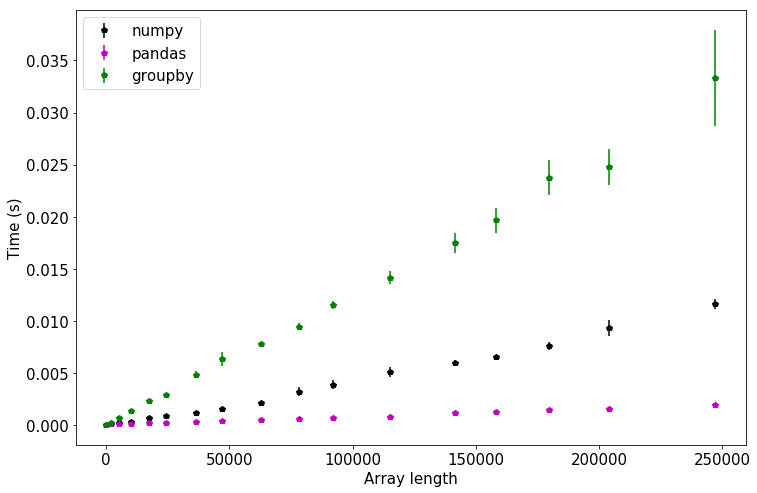

In [19]:
plt.errorbar(lengths, lmap(attrgetter("average"), times_numpy  ), lmap(attrgetter("stdev"), times_numpy  ), fmt="kp", label="numpy"  )
plt.errorbar(lengths, lmap(attrgetter("average"), times_pandas ), lmap(attrgetter("stdev"), times_pandas ), fmt="mp", label="pandas" )
plt.errorbar(lengths, lmap(attrgetter("average"), times_groupby), lmap(attrgetter("stdev"), times_groupby), fmt="gp", label="groupby")
plt.xlabel("Array length")
plt.ylabel("Time (s)")
plt.legend()

/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


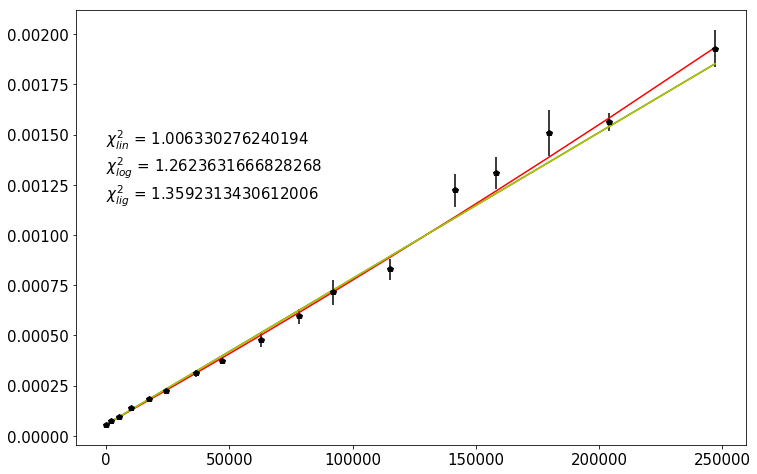

In [38]:
x = np.array(lengths)
y = lmap(attrgetter("average"), times_pandas )
e = lmap(attrgetter("stdev"), times_pandas )

logfun = lambda x, a, b, c   :                  a * np.log(fitf.polynom(x, b, c))
ligfun = lambda x, a, b, c, d: fitf.polynom(a, b) * np.log(fitf.polynom(x, c, d))
linfit = fitf.fit(fitf.polynom, x, y, (0, 1, 1   ), sigma=e, maxfev=int(1e6))
logfit = fitf.fit(logfun      , x, y, (0, 1, 1   ), sigma=e, maxfev=int(1e6))
ligfit = fitf.fit(ligfun      , x, y, (0, 1, 1, 1), sigma=e, maxfev=int(1e6))

plt.errorbar(x, y, e, fmt="kp")
plt.plot    (x, linfit.fn(x), "r-")
plt.plot    (x, logfit.fn(x), "g-")
plt.plot    (x, ligfit.fn(x), "y-")
plt.text    (0, plt.ylim()[1]/2,
f"""
$\chi_{{lin}}^2$ = {linfit.chi2}
$\chi_{{log}}^2$ = {logfit.chi2}
$\chi_{{lig}}^2$ = {ligfit.chi2}
""")

In [5]:
y = False

In [6]:
%%timeit -n 100000 -r 100

y = False

25.2 ns ± 6.53 ns per loop (mean ± std. dev. of 100 runs, 100000 loops each)


In [9]:
y = True

In [11]:
%%timeit -n 100000 -r 100

if y:
    x = False

48.3 ns ± 11.1 ns per loop (mean ± std. dev. of 100 runs, 100000 loops each)


[  5.03088059e+04  -2.00894812e+00]


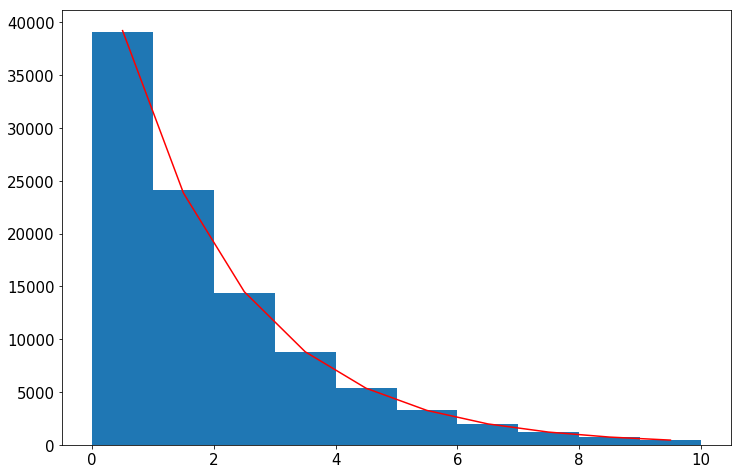

In [30]:
means = np.random.exponential(2, size=100000)
bins  = np.linspace(0, 10, 11)
y, x, _ = plt.hist(means, bins)
x     = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.expo, x, y, (1e4, -0.5), sigma=np.clip(np.sqrt(y), 3, np.inf))
print(f.values)
plt.plot(x, f.fn(x), "r-")

In [34]:
bins  = np.linspace(0, 10, 11)
x     = bins[:-1] + np.diff(bins) * 0.5

pull = []
for i in range(1000):
    means = np.random.exponential(2, size=1000)
    y, *_ = np.histogram(means, bins)
    u     = np.clip(np.sqrt(y), 3, np.inf)
    f = fitf.fit(fitf.expo, x, y, (1e4, -0.5), sigma=u)
    pull.append((y - f.fn(x)) / u)
pull = np.array(pull)

/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:82: RuntimeWarning: overflow encountered in exp
  return const * np.exp(x/mean)
/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:82: RuntimeWarning: overflow encountered in multiply
  return const * np.exp(x/mean)


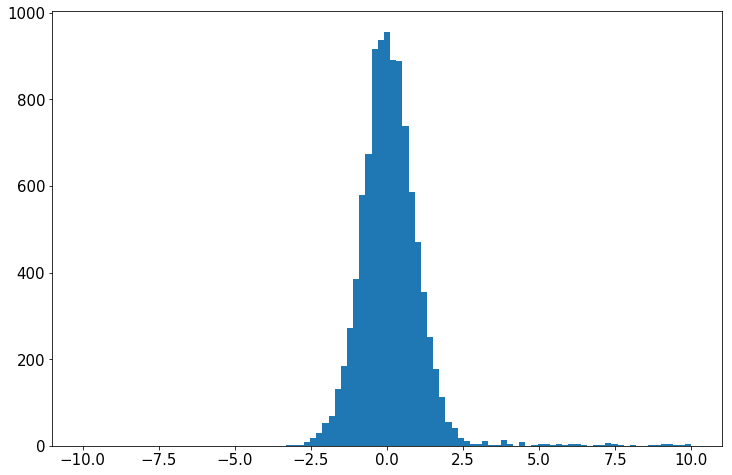

In [36]:
plt.hist(pull.flatten(), np.linspace(-10, 10, 100));